In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


cyberdata=pd.read_csv("cybersecurity_attacks.csv")
cyberdata.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


cyberdata.columns = cyberdata.columns.str.strip()  
cyberdata.columns = cyberdata.columns.str.lower()  

ip = cyberdata[["attack type","source ip address",	"destination ip address"]]
ip

#### We analyse only the first part of the ip adress to determine if there is some good thing

In [21]:
import pandas as pd
import matplotlib.pyplot as plt


cyberdata.columns = cyberdata.columns.str.strip()  
cyberdata.columns = cyberdata.columns.str.lower()


ip = cyberdata[["attack type", "source ip address", "destination ip address"]].copy()
ip['source_ip_part1'] = ip['source ip address'].str.split('.').str[0]
ip['destination_ip_part1'] = ip['destination ip address'].str.split('.').str[0]
ip['source_ip_part1'] = pd.to_numeric(ip['source_ip_part1'], errors='coerce')
ip['destination_ip_part1'] = pd.to_numeric(ip['destination_ip_part1'], errors='coerce')
ip


,attack type,source ip address,destination ip address,source_ip_part1,destination_ip_part1
0,Malware,103.216.15.12,84.9.164.252,103,84
1,Malware,78.199.217.198,66.191.137.154,78,66
2,DDoS,63.79.210.48,198.219.82.17,63,198
3,Malware,163.42.196.10,101.228.192.255,163,101
4,DDoS,71.166.185.76,189.243.174.238,71,189
...,...,...,...,...,...
39995,DDoS,26.36.109.26,121.100.75.240,26,121
39996,DDoS,17.21.163.81,196.108.134.78,17,196
39997,DDoS,162.35.217.57,98.107.0.15,162,98
39998,Malware,208.72.233.205,173.79.112.252,208,173


### Here we are counting how many first part equal to different attack types.

     Source IP Part 1 Count  Destination IP Part 1 Count
201                      88                           66
133                      78                           68
63                       77                           52
55                       77                           56
118                      76                           51
..                      ...                          ...
191                      44                           62
142                      44                           63
192                      42                           58
167                      42                           50
100                      40                           56

[222 rows x 2 columns]


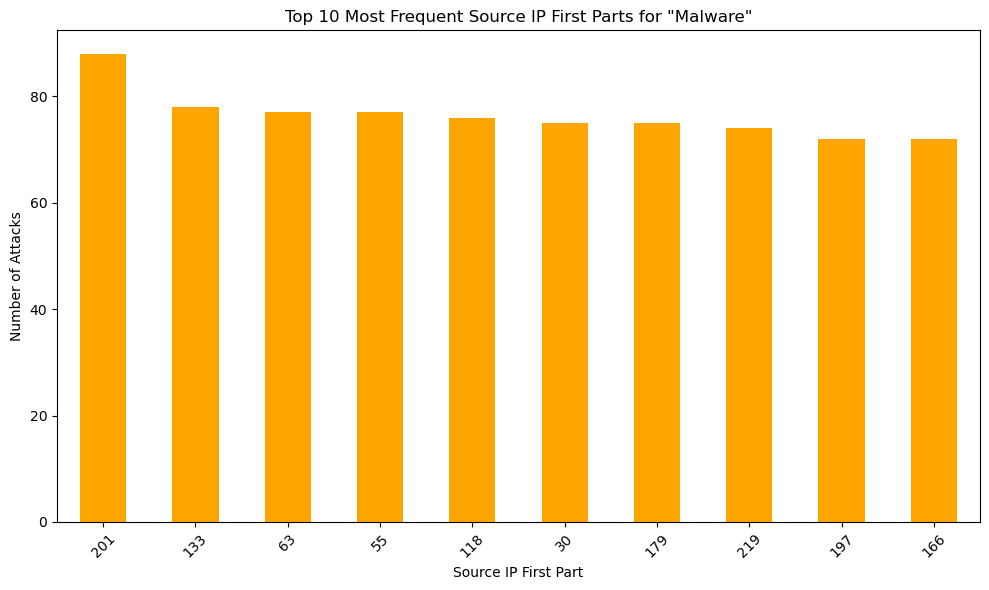

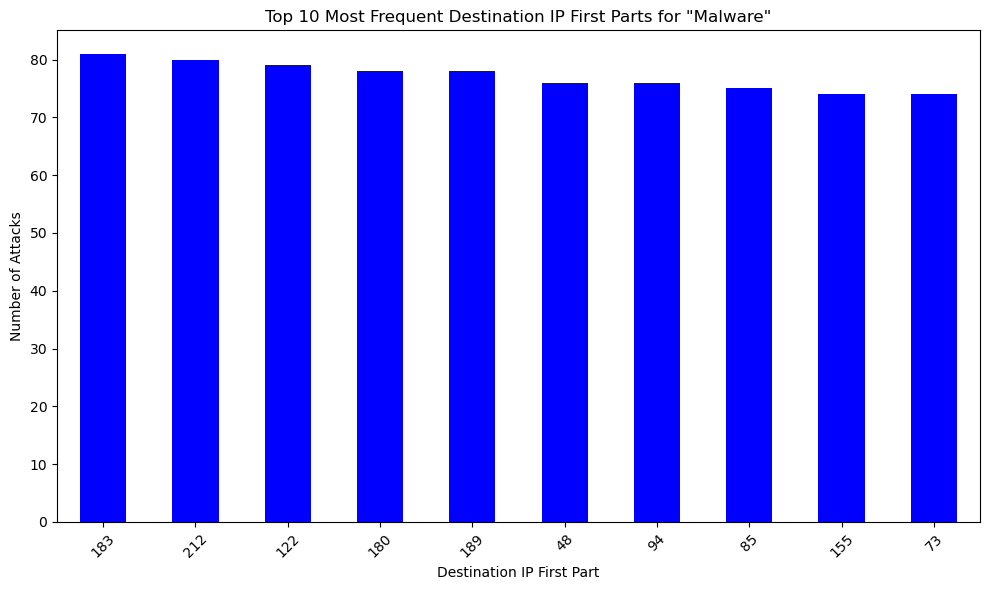

In [28]:

malware_ips = ip[ip['attack type'] == 'Malware']


source_ip_part_counts = malware_ips.groupby('source_ip_part1').size()
destination_ip_part_counts = malware_ips.groupby('destination_ip_part1').size()

source_ip_part_counts_sorted = source_ip_part_counts.sort_values(ascending=False)
destination_ip_part_counts_sorted = destination_ip_part_counts.sort_values(ascending=False)


top_source_ip_parts = source_ip_part_counts_sorted.head(10)
top_destination_ip_parts = destination_ip_part_counts_sorted.head(10)

# Visualization

plt.figure(figsize=(10, 6))
top_source_ip_parts.plot(kind='bar', color='orange')
plt.title('Top 10 Most Frequent Source IP First Parts for "Malware"')
plt.xlabel('Source IP First Part')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

:
plt.figure(figsize=(10, 6))
top_destination_ip_parts.plot(kind='bar', color='blue')
plt.title('Top 10 Most Frequent Destination IP First Parts for "Malware"')
plt.xlabel('Destination IP First Part')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

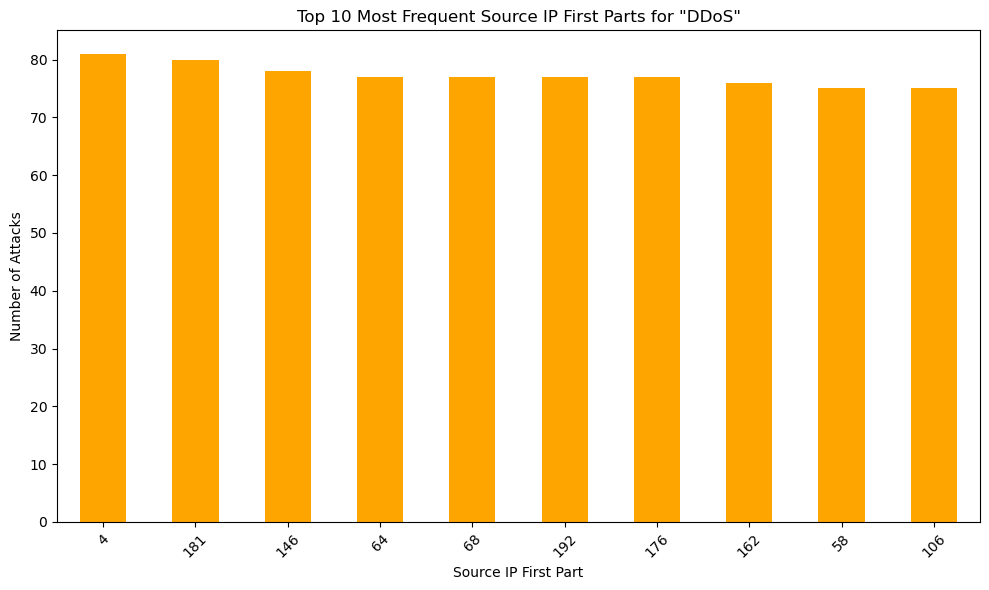

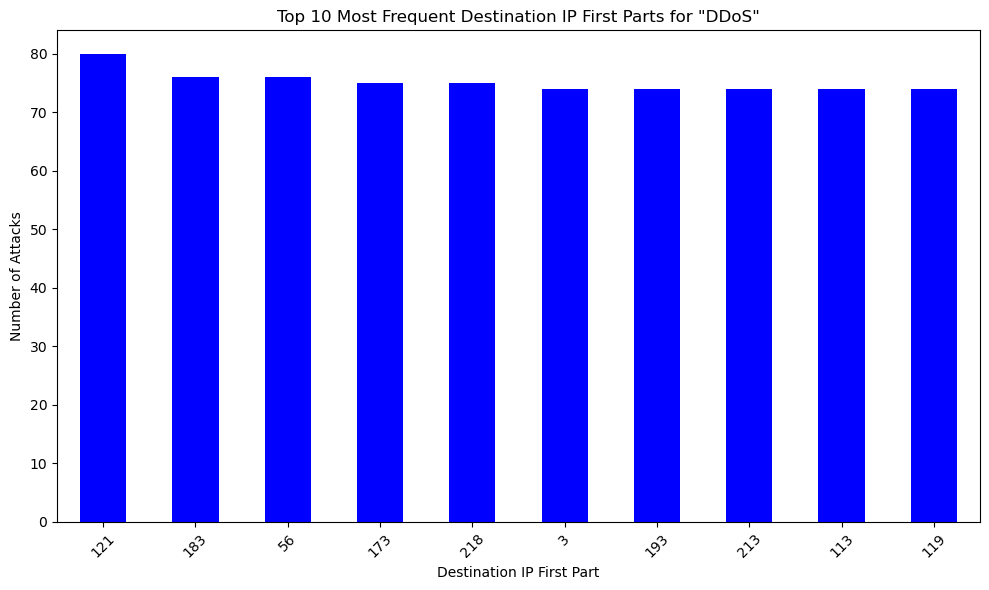

In [30]:
ddos_ips = ip[ip['attack type'] == 'DDoS']

source_ip_part_counts = ddos_ips.groupby('source_ip_part1').size()
destination_ip_part_counts = ddos_ips.groupby('destination_ip_part1').size()
source_ip_part_counts_sorted = source_ip_part_counts.sort_values(ascending=False)
destination_ip_part_counts_sorted = destination_ip_part_counts.sort_values(ascending=False)

top_source_ip_parts = source_ip_part_counts_sorted.head(10)
top_destination_ip_parts = destination_ip_part_counts_sorted.head(10)

# Visualization:
plt.figure(figsize=(10, 6))
top_source_ip_parts.plot(kind='bar', color='orange')
plt.title('Top 10 Most Frequent Source IP First Parts for "DDoS"')
plt.xlabel('Source IP First Part')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
top_destination_ip_parts.plot(kind='bar', color='blue')
plt.title('Top 10 Most Frequent Destination IP First Parts for "DDoS"')
plt.xlabel('Destination IP First Part')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Bilan

#### We can see its better than timestamp the ai did't put impossible to predict its probably a bit better than ramdom so we take it